# Transfer plotting and field effect mobility extracting script

Code written by Elda Sala<br>
More recent update: 02/09/2023<br><br>
The only required input is a directory, that should be inserted at the top of the third code cell.
The script reads txt files starting with "Transfer" in that directory, and loops through them, automatically saving 4 figures for each of them. Figures related to all scanned files are also visible after the main code cell.

In [245]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as stat
import os
import math

In [246]:
def ext_print(x): 
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    return print(x)

2000 3 600.0 20.0
Dielectric layer capacitance is: 4.427e-09  F/m²
6.172e-02
Linear Ion/Ioff ratio is: 1.038e+08
Saturation Ion/Ioff ratio is: 4.656e+05

The highest linear current value is:  3.114e-06 A
The highest saturation current value is:  2.366e-05 A
Ion/Ioff ratio in linear regime is  8  orders of magnitude
Ion/Ioff ratio in saturation regime is  5  orders of magnitude


C:\Users\mafel\AppData\Local\Temp\ipykernel_5472\2707504413.py:82: RuntimeWarning: divide by zero encountered in divide
  mu_lin=L/(W*Cdiel*Vdlin)*(np.diff(Idlin)/np.diff(Vglin)) #field effect mobility in linear regime
C:\Users\mafel\AppData\Local\Temp\ipykernel_5472\2707504413.py:90: RuntimeWarning: divide by zero encountered in divide
  mu_sat=2*L/(W*Cdiel)*(np.diff(srIdsat)/np.diff(Vgsat))**2 #field effect mobility in saturation regime


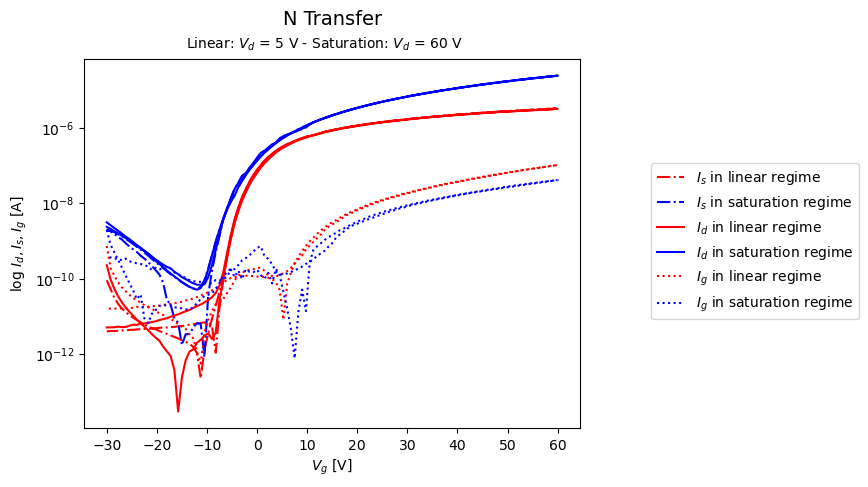

Field effect mobility of the switched on device in linear regime is  2.228e-02  cm²/Vs
Field effect mobility of the switched on device in saturation regime is  2.636e-02  cm²/Vs


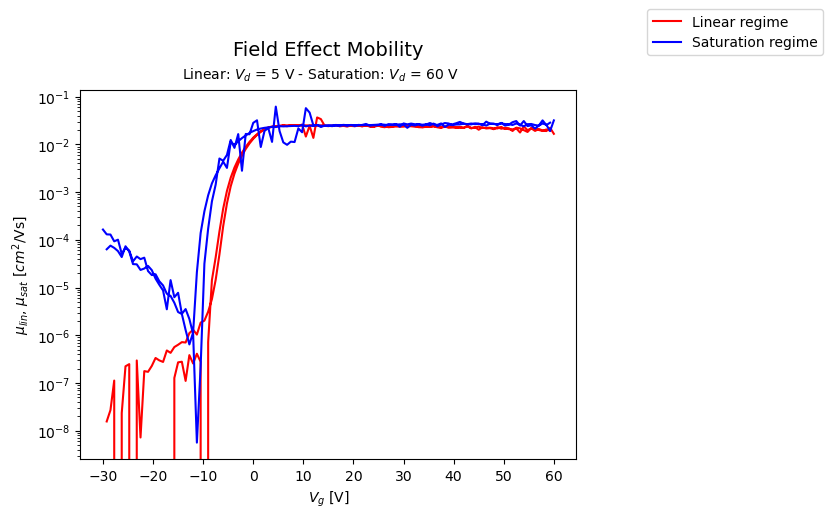

Linear threshold voltage is:  -3.56  V
Saturation threshold voltage is:  -3.43  V


C:\Users\mafel\AppData\Local\Temp\ipykernel_5472\2707504413.py:201: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


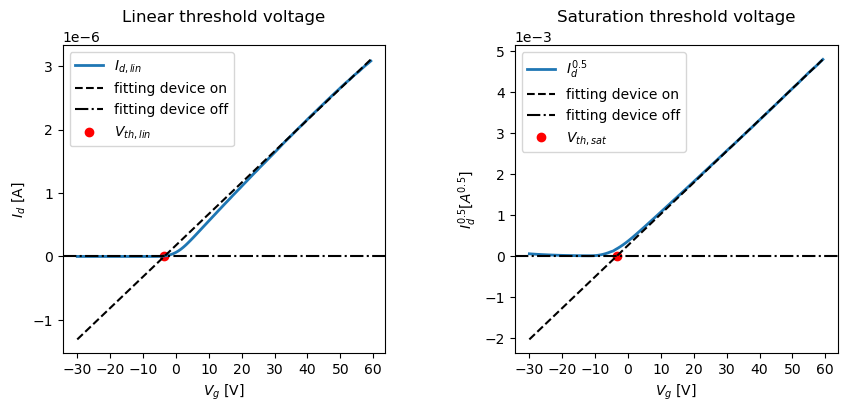

20000 2.95 455.0 40.0
Dielectric layer capacitance is: 5.741e-09  F/m²
7.691e-02
Linear Ion/Ioff ratio is: 1.218e+04
Saturation Ion/Ioff ratio is: 3.385e+04

The highest linear current value is:  2.751e-05 A
The highest saturation current value is:  1.039e-04 A
Ion/Ioff ratio in linear regime is  4  orders of magnitude
Ion/Ioff ratio in saturation regime is  4  orders of magnitude


C:\Users\mafel\AppData\Local\Temp\ipykernel_5472\2707504413.py:82: RuntimeWarning: divide by zero encountered in divide
  mu_lin=L/(W*Cdiel*Vdlin)*(np.diff(Idlin)/np.diff(Vglin)) #field effect mobility in linear regime
C:\Users\mafel\AppData\Local\Temp\ipykernel_5472\2707504413.py:90: RuntimeWarning: divide by zero encountered in divide
  mu_sat=2*L/(W*Cdiel)*(np.diff(srIdsat)/np.diff(Vgsat))**2 #field effect mobility in saturation regime


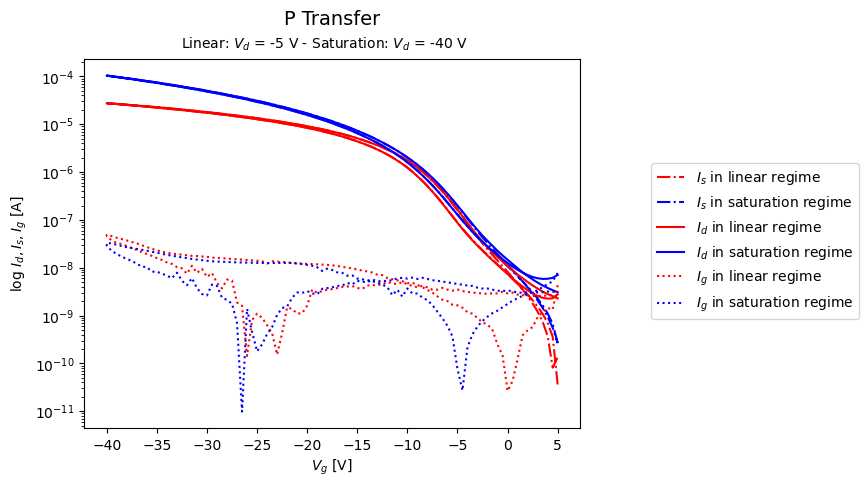

Field effect mobility of the switched on device in linear regime is  6.815e-02  cm²/Vs
Field effect mobility of the switched on device in saturation regime is  6.988e-02  cm²/Vs


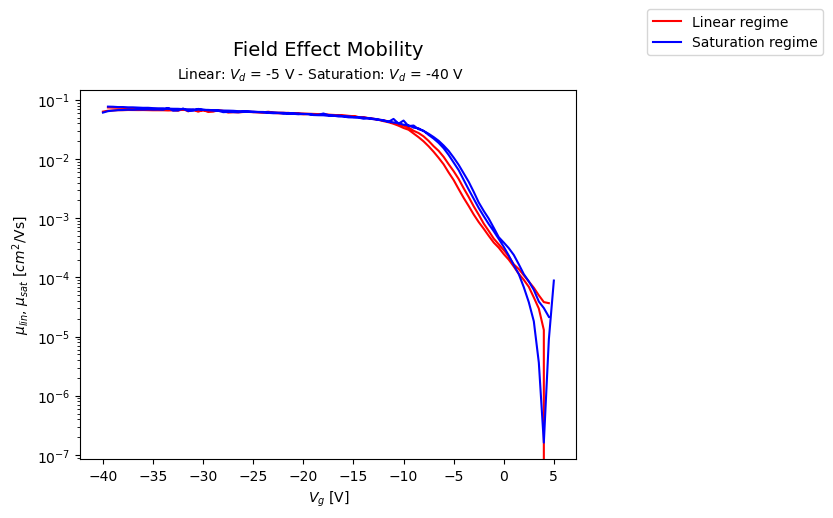

Linear threshold voltage is:  -12.15  V
Saturation threshold voltage is:  -7.96  V


C:\Users\mafel\AppData\Local\Temp\ipykernel_5472\2707504413.py:201: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


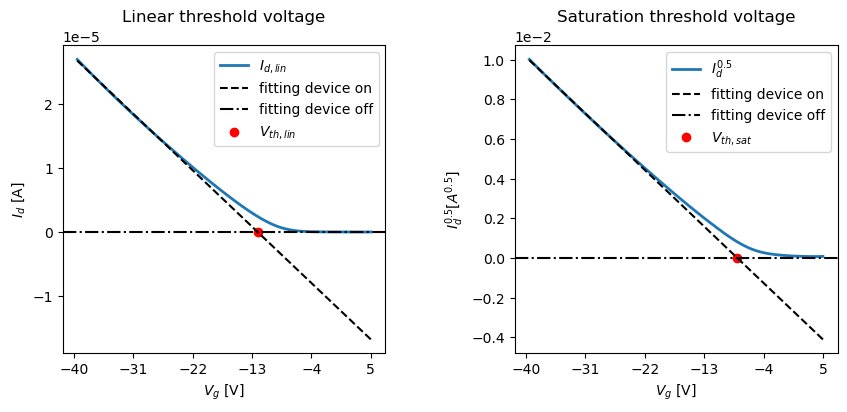

In [247]:
# DATA IMPORTATION AND LOOP SET-UP
directory = 'C:/Users/mafel/OneDrive/Documenti/PYTHON/Python Scripts/Test' # INSERT DIRECTORY HERE
os.chdir(directory)
index=0 
txt_files = [f for f in os.listdir(directory) if f.startswith("Transfer") and f.endswith(".txt")]

parameters_list = [] #initialisation of list for summary dataframe

for file_name in txt_files:
        index += 1
        file_path = os.path.join(directory, file_name)

#file_name="FILENAME" #for single file run

        transfer = pd.read_table(file_name)

# DEVICE PARAMETERS EXTRACTION

        pattern = "_patt" #extraction of channel width W in um based on device geometry
        positionP=file_name.find(pattern)
        if positionP != -1:
            P=file_name[positionP + len(pattern):positionP + len(pattern)+3]
            if P == 'CMS':
                W=20000
            else:
                W=2000
        else:
            print("Information about the pattern was not found in the file name.")
    
        dielectric="_diel" #extraction of insulator dielectric constant
        positionD=file_name.find(dielectric)
        if positionD != -1:
            D=file_name[positionD + len(dielectric):positionD + len(dielectric)+4]
            if D == 'PARY':
                r=2.95
            elif D == 'PMMA':
                r=3
            else:
                r==2.6
        else:
            print("Information about the dielectric constant was not found in the file name.")
    
        thickness="_nm" #extraction of dielectric thickness in nm
        positionT=file_name.find(thickness)
        if positionT != -1:
            d=float(file_name[positionT + len(thickness):positionT + len(thickness)+3])
        else:
            print("Information about the thickness of the insulator was not found in the file name.")

        channel="_ch" #extraction of channel length L in um
        positionC=file_name.find(channel)
        if positionC != -1:
            L=float(file_name[positionC + len(channel):positionC + len(channel)+2])
        else:
            print("Information about the channel length was not found in the file name.")
            
        print(W,r,d,L) #extraction check
        
# RENAMING VARIABLES CONVENIENTLY

        Vdlin=transfer.Vd[0] #source-drain voltage in linear regime
        Vdsat=transfer.Vd[len(transfer.Vd)-1] #source-drain voltage in saturation regime

        Islin=transfer.absIs[:len(transfer.Vg)//2] #source current in linear regime
        Idlin=transfer.absId[:len(transfer.Vg)//2] #drain current in linear regime
        Iglin=transfer.absIg[:len(transfer.Vg)//2] #gate current in linear regime
        Issat=transfer.absIs[len(transfer.Vg)//2:] #source current in saturation regime
        Idsat=transfer.absId[len(transfer.Vg)//2:] #drain current in saturation regime
        Igsat=transfer.absIg[len(transfer.Vg)//2:] #gate current in saturation regime

        Vglin=transfer.Vg[:len(transfer.Vg)//2] #gate voltage in linear regime
        Vgsat=transfer.Vg[len(transfer.Vg)//2:] #gate voltage in saturation regime

        srIdsat=np.sqrt(Idsat) #squared root of saturation drain current
        Cdiel=8.854*10**(-7)*r/d #insulator capacitance
        
        print("Dielectric layer capacitance is: ""{:.3e}".format(Cdiel),' F/m\u00b2') #dielectric check
        
# MOBILITY EXTRACTION

        if L != 25:
            mu_lin=L/(W*Cdiel*Vdlin)*(np.diff(Idlin)/np.diff(Vglin)) #field effect mobility in linear regime
        else:
            mu_lin=L/(10*W*Cdiel*Vdlin)*(np.diff(Idlin)/np.diff(Vglin)) #channel 25 is actually 2.5 um
        mu_lin[mu_lin==-np.inf]=np.nan #correction for non differentiable points
        mu_lin[mu_lin==np.inf]=np.nan
    

        if L != 25:
            mu_sat=2*L/(W*Cdiel)*(np.diff(srIdsat)/np.diff(Vgsat))**2 #field effect mobility in saturation regime
        else:
            mu_sat=2*L/(10*W*Cdiel)*(np.diff(srIdsat)/np.diff(Vgsat))**2
        mu_sat[mu_sat==-np.inf]=np.nan
        mu_sat[mu_sat==np.inf]=np.nan
        
        
        lin_plateau=mu_lin[int(len(Vglin)/3):int(len(Vglin)/2-2)] #plateau region of linear mobility: to adjust after seeing transfer curve!!
        sat_plateau=mu_sat[int(len(Vgsat)/3):int(len(Vgsat)/2-2)] #plateau region of saturation mobility

        av_mu_lin=stat.mean(lin_plateau)
        av_mu_sat=stat.mean(sat_plateau)

        print("{:.3e}".format(max(mu_sat))) #max mobility, unreliable if curve is noisy
    
        
# Ion/Ioff RATIO EXTRACTION
        
        def ord_magn(x): # order of magnitude function
            return math.floor(math.log(x, 10))

        lin_ratio=(max(Idlin)/min(Idlin)) #Ion/Ioff ratio in linear regime
        sat_ratio=(max(Idsat)/min(Idsat)) #Ion/Ioff ratio in saturation regime

        print("Linear Ion/Ioff ratio is: ""{:.3e}".format(lin_ratio))
        print("Saturation Ion/Ioff ratio is: ""{:.3e}".format(sat_ratio))


# THRESHOLD VOLTAGE EXTRACTION - check intervals after seeing curves

        p=np.polyfit(Vglin[int(len(Vglin)/3):int(len(Vglin)/2-1)],Idlin[int(len(Idlin)/3):int(len(Idlin)/2-1)],1) #minIdlin=p(0)*Vth_lin+p(1)
        Vth_lin=(min(Idlin)-p[1])/p[0] #minIdlin is very close to zero
        s=np.polyfit(Vgsat[int(len(Vgsat)/3):int(len(Vgsat)/2-1)],srIdsat[int(len(srIdsat)/3):int(len(srIdsat)/2-1)],1)
        Vth_sat=(min(Idsat)-s[1])/s[0]

        if abs(Vth_sat) > abs(Vth_lin) + 1: #checks for any significant shifts in the Vth
            print("The device possibly suffers from bias stress")
        else:
            print()
            
# PLOTTING CURVES - transfer curves

        def sc_not3(x): #to ease plotting
            return "{0:.3e}".format(x)
        
        def osc_type(Vds): #to recognize semiconductor type
            if Vdlin<0:
                return 'P'
            else:
                return 'N'

        print('The highest linear current value is: ',sc_not3(max(Idlin)), 'A')
        print('The highest saturation current value is: ',sc_not3(max(Idsat)), 'A')
        print('Ion/Ioff ratio in linear regime is ',ord_magn(lin_ratio),' orders of magnitude')
        print('Ion/Ioff ratio in saturation regime is ',ord_magn(sat_ratio),' orders of magnitude')

        fig,ax=plt.subplots()
        plt.title(f'{osc_type(Vdlin)} Transfer', fontsize=14, y=1.07)
            
        fig.suptitle('Linear: $V_{d}$ ='f' {Vdlin} V - ''Saturation: $V_{d}$ ='f' {Vdsat} V', fontsize=10, y=0.93)    
        #it defines linear and saturation regimes

        ax.plot(Vglin,Islin, '-.r', label='$I_{s}$ in linear regime')
        ax.plot(Vgsat,Issat,'-.b', label='$I_{s}$ in saturation regime')
        ax.plot(Vglin,Idlin, 'r', label='$I_{d}$ in linear regime')
        ax.plot(Vgsat,Idsat,'b', label='$I_{d}$ in saturation regime')
        ax.plot(Vglin,Iglin, ':r', label='$I_{g}$ in linear regime')
        ax.plot(Vgsat,Igsat,':b', label='$I_{g}$ in saturation regime')
        ax.set_yscale('log')
        if Vdlin<0:
            plt.xticks(np.arange(-40, 10, step=5))
        else:
            plt.xticks(np.arange(-30,65,step=10))
        ax.set_xlabel('$V_{g}$ [V]')
        ax.set_ylabel('log $I_{d}, I_{s}, I_{g}$ [A]')

        fig.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=1)
        plt.savefig(f'{file_name}_transfer.png')

        plt.show()
        
# mobility curves

        print('Field effect mobility of the switched on device in linear regime is ',sc_not3(av_mu_lin),' cm\u00b2/Vs')
        print('Field effect mobility of the switched on device in saturation regime is ',sc_not3(av_mu_sat),' cm\u00b2/Vs')

        fig,ax=plt.subplots()
        plt.title('Field Effect Mobility', fontsize=14,y=1.07)
        fig.suptitle('Linear: $V_{d}$ ='f' {Vdlin} V - ''Saturation: $V_{d}$ ='f' {Vdsat} V', fontsize=10, y=0.93)    

        ax.plot(Vglin[:len(Vglin)-1], mu_lin, label='Linear regime', color='red')
        ax.plot(Vgsat[:len(Vgsat)-1], mu_sat, label='Saturation regime', color='blue')
        if Vdlin<0:
            plt.xticks(np.arange(-40, 10, step=5))
        else:
            plt.xticks(np.arange(-30,65,step=10))
        ax.set_yscale('log')
        ax.set_xlabel('$V_{g}$ [V]')
        ax.set_ylabel('$\u00b5_{lin}$, $\u00b5_{sat}$ [$cm^2$/Vs]')

        fig.legend(bbox_to_anchor=(1, 1), loc='center left', ncol=1)
        plt.savefig(f'{file_name}_mobility.png')

        plt.show()
        
# threshold voltage curves

        print("Linear threshold voltage is: ","{:.2f}".format(Vth_lin)," V")
        print("Saturation threshold voltage is: ","{:.2f}".format(Vth_sat)," V")

        fig, ax=plt.subplots(figsize=(10,4))
        plt.subplot(121)
        plt.title('Linear threshold voltage', fontsize=12, y=1.05)
        plt.plot(Vglin[:int(len(Vglin)/2-1)],Idlin[:int(len(Idlin)/2-1)], label='$I_{d,lin}$',linewidth=2.0)
        plt.plot(Vglin[:int(len(Vglin)/2-1)],np.polyval(p,Vglin[:int(len(Vglin)/2-1)]),'--k', label='fitting device on')
        plt.axhline(y=min(Idlin),color='k', linestyle='-.',label='fitting device off')
        plt.scatter(Vth_lin, min(Idlin), marker='o', color='r', label='$V_{th,lin}$')
        plt.xlabel('$V_{g}$ [V]')
        plt.ylabel('$I_{d}$ [A]')
        if Vdlin<0:
            plt.xticks(np.arange(-40, 10, step=9))
        else:
            plt.xticks(np.arange(-30,65,step=10))
        plt.legend()

        plt.subplots_adjust(wspace=0.4)
         
        plt.subplot(122)
        plt.title('Saturation threshold voltage', fontsize=12, y=1.05)
        plt.plot(Vgsat[:int(len(Vgsat)/2-1)],srIdsat[:int(len(srIdsat)/2-1)],label='$I_{d}^{0.5}$',linewidth=2.0)
        plt.plot(Vgsat[:int(len(Vgsat)/2-1)],np.polyval(s,Vgsat[:int(len(Vgsat)/2-1)]),'--k',label='fitting device on')
        plt.axhline(y=min(Idsat),color='k', linestyle='-.',label='fitting device off')
        plt.scatter(Vth_sat, min(Idsat), marker='o', color='r', label='$V_{th,sat}$')
        plt.xlabel('$V_{g}$'' [V]')
        plt.ylabel('$I_{d}^{0.5}  [A^{0.5}]$')
        if Vdlin<0:
            plt.xticks(np.arange(-40, 10, step=9))
        else:
            plt.xticks(np.arange(-30,65,step=10))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.legend()
        plt.savefig(f'{file_name}_Vth.png')

        plt.show()

# SUMMARY DATA

        parameters = {
            #'ID': file_name,
            'Osc type': osc_type(Vdlin),
            'Cap [F/m^2]': sc_not3(Cdiel),
            'Ch Length [um]': int(L),
            'Ch Width [um]': int(W),
            'Lin Mob [cm^2/Vs]': sc_not3(av_mu_lin),
            'Sat Mob [cm^2/Vs]': sc_not3(av_mu_sat),
            'Lin Vth [V]': "{:.3f}".format(Vth_lin),
            'Sat Vth [V]': "{:.3f}".format(Vth_sat),
            'Lin OnOff': sc_not3(lin_ratio),
            'Sat OnOff': sc_not3(sat_ratio),
            #'Max Id,lin [A]': sc_not3(max(Idlin)),
            #'Max Id,sat [A]': sc_not3(max(Idsat))
        }
        parameters_list.append(parameters)
        

        

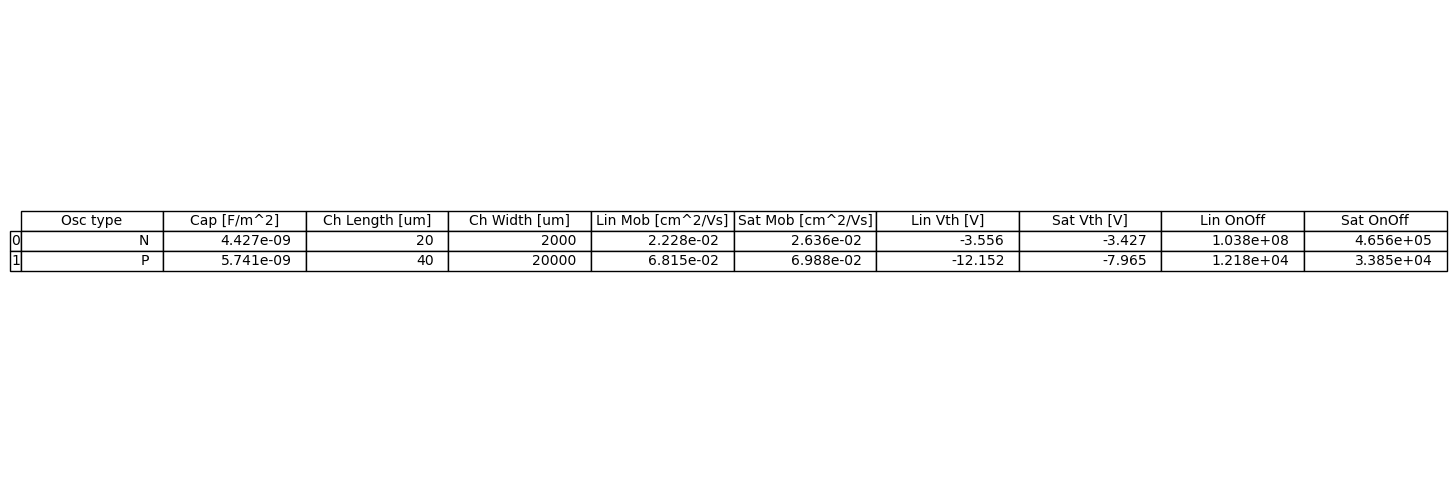

In [248]:
# COMPOSITION OF THE FINAL DATAFRAME

summary = pd.DataFrame(parameters_list)
#ext_print(summary)

fig, ax = plt.subplots(figsize=(8, 6))
table = pd.plotting.table(ax, summary, loc='center')
ax.axis('off')

table.auto_set_font_size(False)
#table.set_fontsize(9)
table.scale(2.3, 1.2)

plt.savefig('Summary_dataframe.png', bbox_inches='tight', dpi=300)

plt.show()